# Open Source Data Analysis- Regression

### 1) Importing Libraries and Setting Path

In [29]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#creating Paths
path= r'C:\Users\wjzak\Dropbox\Career Foundry\Data Immersion\Module 6- Advanced Analytics & Dashboard Design\09-2025- HR Data MNC- Analysis'

#using the path to pull file name and read the clean products data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'HR_Data_MNC_Data_Cleaned.csv'), index_col = False)

### 2) Data Prep

In [30]:
df.head()

,Unnamed: 0,Employee_ID,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary,City,Country,Status2
0,0,EMP0000001,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,17868,Isaacland,Denmark,Inactive
1,1,EMP0000002,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,9554,Anthonyside,Costa Rica,Active
2,2,EMP0000003,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,16118,Port Christinaport,Saudi Arabia,Active
3,3,EMP0000004,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,11166,Port Shelbychester,Antigua and Barbuda,Active
4,4,EMP0000005,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,6031,Lake Kimberly,Palestinian Territory,Active


In [31]:
#drop the unnamed variable- we already have an employee ID to reference
df = df.drop(columns=['Unnamed: 0'])

In [32]:
#review data types for variables
df.dtypes

Employee_ID           object
Department            object
Job_Title             object
Hire_Date             object
Location              object
Performance_Rating     int64
Experience_Years       int64
Status                object
Work_Mode             object
Salary                 int64
City                  object
Country               object
Status2               object
dtype: object

In [33]:
#Checking for Mixed Types in Columns
for col in df.columns.tolist():
      weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
    #No output means no mixed columns

In [35]:
#converts the salary to a more reasonable number that is equivalent to US Standards
df['Salary'] = np.ceil(df['Salary'] * 7).astype(int)
df.describe().astype(int)

,Performance_Rating,Experience_Years,Salary
count,2000000,2000000,2000000
mean,3,5,70758
std,1,3,31761
min,1,0,23667
25%,2,2,48629
50%,3,5,63987
75%,4,8,84714
max,5,15,236670


In [36]:
#check for missing values in dataframe
df.isnull().sum()

Employee_ID           0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary                0
City                  0
Country               0
Status2               0
dtype: int64

In [37]:
#create duplicate data frame
dups = df.duplicated()

In [38]:
dups.shape #no dupes

(2000000,)

##### Checking Salary Dependent Variable

<Axes: xlabel='Salary', ylabel='Count'>

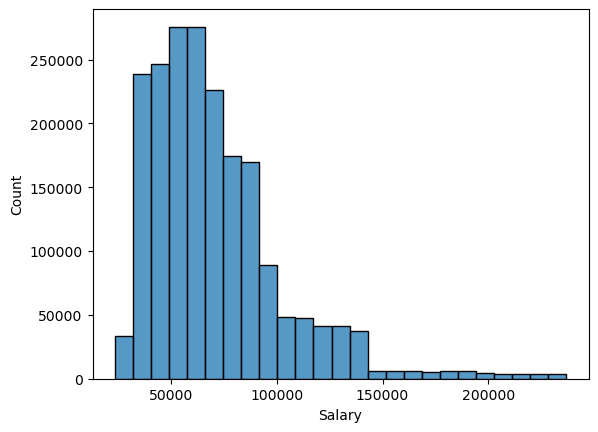

In [41]:
sns.histplot(df['Salary'], bins=25)

Salary looks to be an interesting variables here with a few outliers towards the end of the data. It will be interesting to see how this compares to the other variables as well.

In [40]:
df['Salary'].mean() #Check the mean

np.float64(70758.970478)

In [42]:
df['Salary'].median() #Check the median

63987.0

In [43]:
df['Salary'].max() #Check the max

236670

In [17]:
df_map = df.copy()

HYPOTHESIS: Salary was an interesting variable in the previous example. The data demonstrated some trends in the data across various countries. I want to see what factors influence Salaries and one of the largest is likely Years of Experience at the company. Most people tend to increase salaries the longer they stay at any one company and this analysis will test that.

### 3) Data Prep for Regression

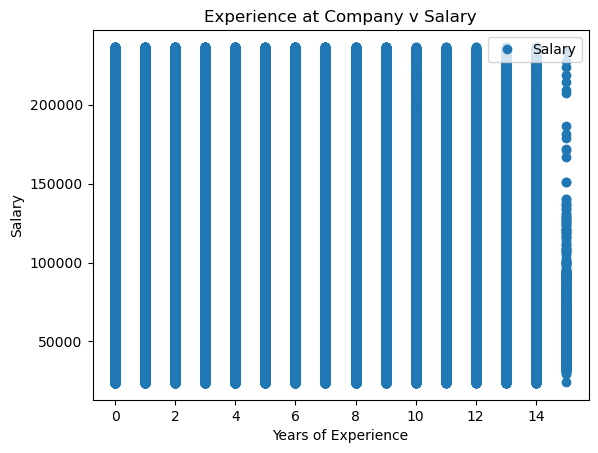

In [67]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Experience_Years', y='Salary',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Experience at Company v Salary')  
plt.xlabel('Years of Experience')  
plt.ylabel('Salary')  
plt.show()

In [48]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Experience_Years'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [49]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [50]:
#Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [52]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

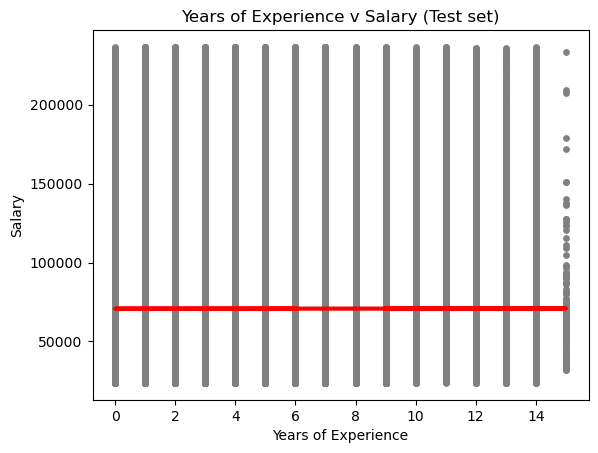

In [53]:
#Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Years of Experience v Salary (Test set)')
plot_test.xlabel('Years of Experience')
plot_test.ylabel('Salary')
plot_test.show()

The line was not a great fit for the data. There are too many instances of data not near or touching the line.

In [54]:
#Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [55]:
#Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.09900835]]
Mean squared error:  1010939423.71148
R2 score:  -1.0215522316947556e-07


In [56]:
#Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,71435,70774.825349
1,79149,70762.627332
2,26446,70750.429315
3,42833,70762.627332
4,98049,70750.429315
5,35357,70756.528324
6,55265,70756.528324
7,87619,70787.023366
8,66941,70799.221382
9,38920,70799.221382


In [58]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [59]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.09900835]]
Mean squared error:  1007910084.4576454
R2 score:  4.80328079865977e-07


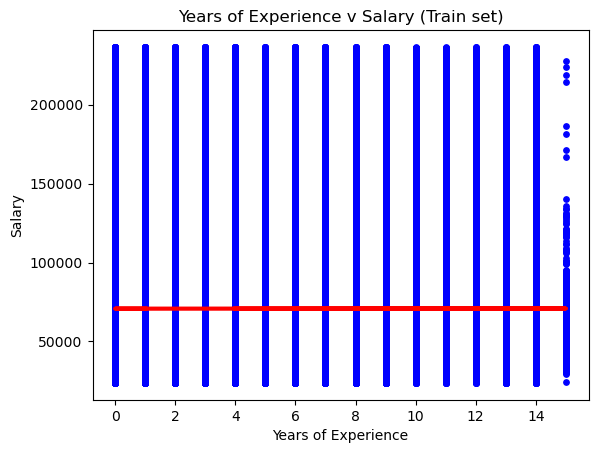

In [64]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Years of Experience v Salary (Train set)')
plot_test.xlabel('Years of Experience')
plot_test.ylabel('Salary')
plot_test.show()

CONCLUSION:The models performed the same on both the test and train sets of data. This is largely due to the vast amount of data generated for this specific project. It is difficult to find a specific factor to influence another when there is this much data available. And it looks to have been generated evenly across all factors. It was interesting to test these data in this way- but the findings were not vary interesting. 
One can likely still assume years of experience does generate increases in salary but these data do not demonstrate that specific example. The models fit was not great in both sets and the effect size was very small. 
I did try a few instances looking at performance rating but found that to be very similar in outcomes here.

### 5) Data Export to Prepared Folder

In [66]:
#Save updated csv file to Prepared Data Folder
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'HR_Data_MNC_Data_Reg.csv'))